#Imports

In [1]:
from sklearn.preprocessing import StandardScaler#import scaler for normalisation
from sklearn.datasets import load_iris #getting the data
from sklearn.model_selection import train_test_split #split data
from sklearn.neighbors import KNeighborsClassifier #import knn
from sklearn.metrics import accuracy_score #import accuracy score
from sklearn.model_selection import GridSearchCV #import grid search for knn

#Loading data

In [2]:
iris=load_iris()
x=load_iris().data  # put data in x
y=load_iris().target #put data in y

In [3]:
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [4]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
print(load_iris().feature_names) #print names of data

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
print(load_iris().target_names) #print names of target

['setosa' 'versicolor' 'virginica']


#Scaling

In [7]:
Scaler=StandardScaler().fit(x) #create scaler and fit data
normx=Scaler.transform(x) #transform data

#Function for classification using k-nearest neighbor


In [16]:

def knn(x_train,x_test,y_train,y_test,k):#function for knn classification
  model=KNeighborsClassifier(n_neighbors=k) #create model
  knn_res=model.fit(x_train,y_train) #fit data
  y_pred=model.predict(x_test) #predict data
  taux_error=1-accuracy_score(y_test,y_pred) #calculate error
  print("taux_error:" ,taux_error)
  return taux_error


#Split data intp train & test


In [17]:
x_train,x_test,y_train,y_test=train_test_split(normx,y,test_size=0.4) #split data #random_state is for shuffling data

In [18]:
for k in[3,7,9]:
  p=knn(x_train,x_test,y_train,y_test,3) #call function
  print(p)

taux_error: 0.033333333333333326
0.033333333333333326
taux_error: 0.033333333333333326
0.033333333333333326
taux_error: 0.033333333333333326
0.033333333333333326


In [19]:
param={"n_neighbors":list(range(1,20))}
knn_grid=GridSearchCV(KNeighborsClassifier(),param,cv=5,scoring='accuracy') #crosvalidation (5 combinaison train test)
knn_grid.fit(x_train,y_train) #fit data
best_k=knn_grid.best_params_['n_neighbors'] #get best k
print("best k for this model:",best_k)
print("class with best k= ",best_k)
knn(x_train,x_test,y_train,y_test,best_k) #call function with best k



best k for this model: 2
class with best k=  2
taux_error: 0.050000000000000044


0.050000000000000044

#Prediction & confusion matrix

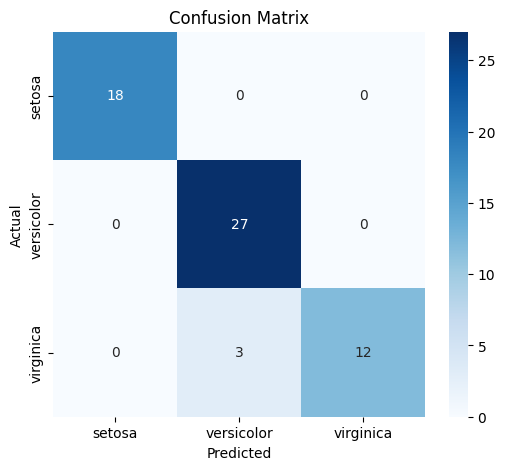

In [20]:
from sklearn.metrics import confusion_matrix #import confusion matrix
import seaborn as sns #import seaborn for heatmap
import matplotlib.pyplot as plt #import matplotlib for plot
import matplotlib.pyplot as plt

#predict classes for test
model=KNeighborsClassifier(n_neighbors=best_k) #create model
knn_res=model.fit(x_train,y_train) #fit data
y_pred=model.predict(x_test) #predict

#calculate confusion matrix
cm=confusion_matrix(y_test,y_pred) #calculate confusion matrix


#show confusion_matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [21]:
from sklearn.metrics import classification_report #import classification report
print(classification_report(y_test,y_pred,target_names=iris.target_names)) #print classification report

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.90      1.00      0.95        27
   virginica       1.00      0.80      0.89        15

    accuracy                           0.95        60
   macro avg       0.97      0.93      0.95        60
weighted avg       0.95      0.95      0.95        60

